## Numpy, Pandas, Matplotlib, Seaborn

In [2]:
!pip install pandas matplotlib seaborn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# making df

students = {
    "Name": ["Ram", "Shyam", "Gopal", "Sita", "Gita"],
    "Age": [20, 22, 23, 23, 21],
    "Department": ["BCT", "Civil", "BEE", "BCT", "Mech"],
    "Marks": [80, 85, 90, 95, 88]
}

df = pd.DataFrame(students)

In [6]:
df

,Name,Age,Department,Marks
0,Ram,20,BCT,80
1,Shyam,22,Civil,85
2,Gopal,23,BEE,90
3,Sita,23,BCT,95
4,Gita,21,Mech,88


In [8]:
# filter - marks greater than 85

df[df["Marks"] > 85]

,Name,Age,Department,Marks
2,Gopal,23,BEE,90
3,Sita,23,BCT,95
4,Gita,21,Mech,88


In [10]:
# multiple filter (marks and department)

df[(df["Department"] == "BCT") & (df["Marks"] > 80)]

,Name,Age,Department,Marks
3,Sita,23,BCT,95


In [ ]:
# Extract name and marks

df[["Name", "Marks"]]

,Name,Marks
0,Ram,80
1,Shyam,85
2,Gopal,90
3,Sita,95
4,Gita,88


In [ ]:
# Sort by marks - ascending order

df.sort_values(by="Marks")

,Name,Age,Department,Marks
0,Ram,20,BCT,80
1,Shyam,22,Civil,85
4,Gita,21,Mech,88
2,Gopal,23,BEE,90
3,Sita,23,BCT,95


In [15]:
# Sort by marks - descending order

df.sort_values(by="Marks", ascending=False)

,Name,Age,Department,Marks
3,Sita,23,BCT,95
2,Gopal,23,BEE,90
4,Gita,21,Mech,88
1,Shyam,22,Civil,85
0,Ram,20,BCT,80


In [22]:
df.describe()

,Age,Marks
count,5.00000,5.00000
mean,21.80000,87.60000
std,1.30384,5.59464
min,20.00000,80.00000
25%,21.00000,85.00000
50%,22.00000,88.00000
75%,23.00000,90.00000
max,23.00000,95.00000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        5 non-null      object
 1   Age         5 non-null      int64 
 2   Department  5 non-null      object
 3   Marks       5 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 292.0+ bytes


In [19]:
print("Mean marks:", df["Marks"].mean())
print("Median marks:", df["Marks"].median())
print("Minimum marks:", df["Marks"].min())
print("Makimum marks:", df["Marks"].max())
print("SD marks:", df["Marks"].std())

Mean marks: 87.6
Median marks: 88.0
Minimum marks: 80
Makimum marks: 95
SD marks: 5.594640292279746


In [23]:
# Correlation of marks and age

df[["Age", "Marks"]].corr()

,Age,Marks
Age,1.000000,0.843099
Marks,0.843099,1.000000


In [ ]:
# Average marks by department
df.groupby("Department")["Marks"].mean()

Department
BCT      87.5
BEE      90.0
Civil    85.0
Mech     88.0
Name: Marks, dtype: float64

In [31]:
# Group with multiple agregations

df.groupby("Department").agg({
    "Marks": ("mean", "min", "max"),
    "Age": ("mean")
})

Marks           Age
            mean min max  mean
Department                    
BCT         87.5  80  95  21.5
BEE         90.0  90  90  23.0
Civil       85.0  85  85  22.0
Mech        88.0  88  88  21.0

In [32]:
df["Result"] = np.where(df["Marks"] > 80, "Pass", "Fail")
df

,Name,Age,Department,Marks,Result
0,Ram,20,BCT,80,Fail
1,Shyam,22,Civil,85,Pass
2,Gopal,23,BEE,90,Pass
3,Sita,23,BCT,95,Pass
4,Gita,21,Mech,88,Pass


In [36]:
df1 = df.drop("Age", axis=1)
df1

,Name,Department,Marks,Result
0,Ram,BCT,80,Fail
1,Shyam,Civil,85,Pass
2,Gopal,BEE,90,Pass
3,Sita,BCT,95,Pass
4,Gita,Mech,88,Pass


In [37]:
df2 = df.drop(1)
df2

,Name,Age,Department,Marks,Result
0,Ram,20,BCT,80,Fail
2,Gopal,23,BEE,90,Pass
3,Sita,23,BCT,95,Pass
4,Gita,21,Mech,88,Pass


In [46]:
df3 = pd.DataFrame({
    "Name": ["A", "B", "C"],
    "Marks": [80, np.nan, 90]
})

df3

,Name,Marks
0,A,80.0
1,B,NaN
2,C,90.0


In [47]:
df3["Marks"] = df3["Marks"].fillna(df3["Marks"].mean())
df3

,Name,Marks
0,A,80.0
1,B,85.0
2,C,90.0


In [50]:
data = {
    "Student": ["Ram", "Shyam", "Gopal", "Sita", "Gita"],
    "Physics": [50, 55, 60, 56, 76],
    "Math": [78, 76, 56, 65, 77],
    "Mechanics": [88, 87, 78, 76, 67],
    "Programming": [80, 87, 76, 78, 88]
}

df = pd.DataFrame(data)

df.set_index("Student", inplace=True)
df.to_csv("student-marks.csv")

In [52]:
df = pd.read_csv("student-marks.csv")
print(df)

  Student  Physics  Math  Mechanics  Programming
0     Ram       50    78         88           80
1   Shyam       55    76         87           87
2   Gopal       60    56         78           76
3    Sita       56    65         76           78
4    Gita       76    77         67           88


In [53]:
df.set_index("Student", inplace=True)
print(df)

         Physics  Math  Mechanics  Programming
Student                                       
Ram           50    78         88           80
Shyam         55    76         87           87
Gopal         60    56         78           76
Sita          56    65         76           78
Gita          76    77         67           88


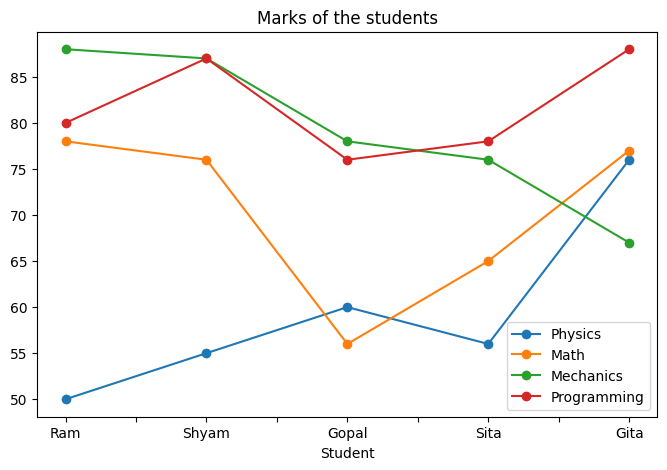

In [66]:
# line plot

df.plot(kind="line", marker="o", figsize=(8, 5), title="Marks of the students")
plt.savefig("images/image1.png")

<Axes: title={'center': 'Marks of the students'}, xlabel='Student'>

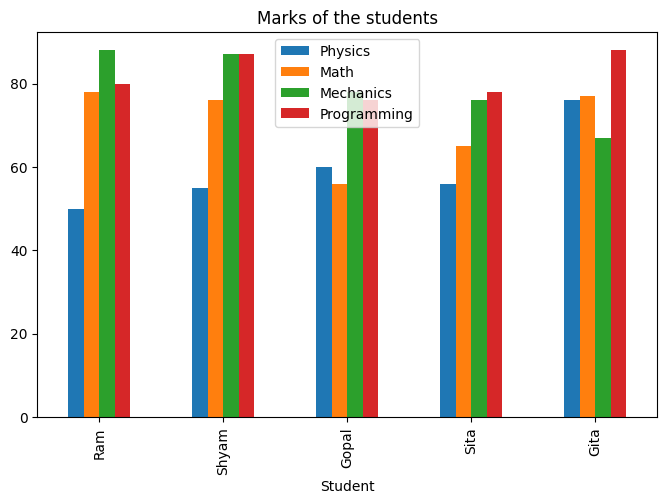

In [61]:
df.plot(kind="bar", figsize=(8, 5), title="Marks of the students")


<Axes: title={'center': 'Marks of the students'}, xlabel='Student'>

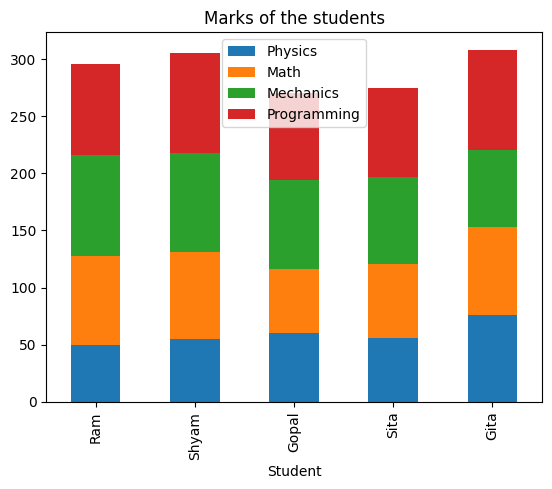

In [64]:
df.plot(kind="bar", stacked=True, title="Marks of the students")

In [67]:
# pie chart

avg_marks = df.mean()
avg_marks

Physics        59.4
Math           70.4
Mechanics      79.2
Programming    81.8
dtype: float64

<Axes: title={'center': 'Average marks per subject'}>

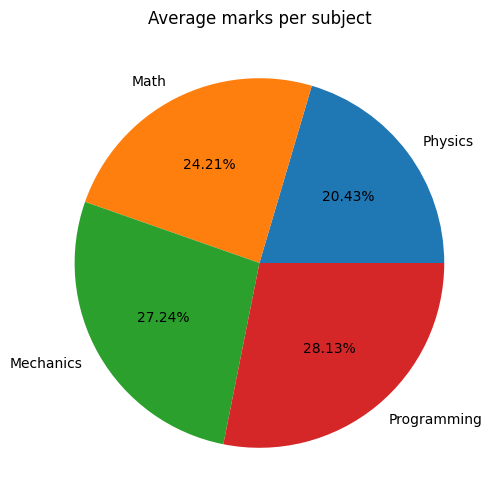

In [77]:
avg_marks.plot(
    kind="pie",
    figsize=(6, 6),
    title="Average marks per subject",
    autopct="%.2f%%"
)

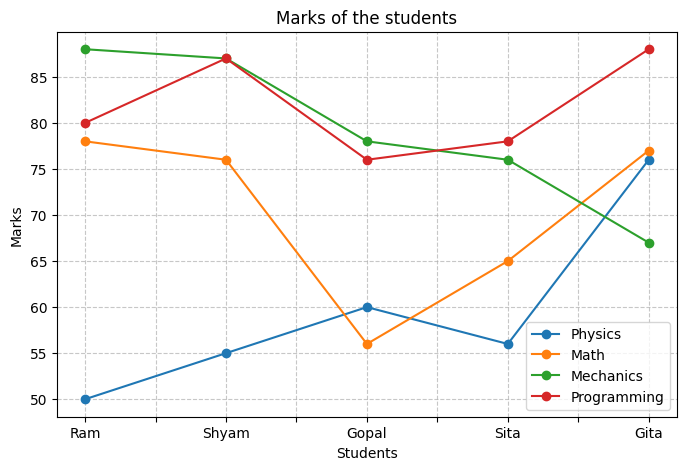

In [78]:
ax = df.plot(kind="line", marker="o", figsize=(8, 5), title="Marks of the students")
ax.set_xlabel("Students")
ax.set_ylabel("Marks")
ax.grid(True, linestyle="--", alpha=0.7)

In [86]:
# Using matplotlib.pyplot

import matplotlib.pyplot as plt

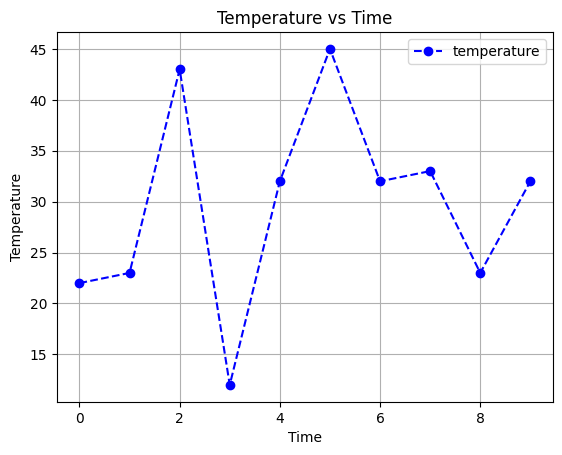

In [85]:
time = np.arange(0, 10, 1)
temperature = np.array([22, 23, 43, 12, 32, 45, 32, 33, 23, 32])

plt.plot(time, temperature, color="b", marker="o", 
        linestyle="--", label="temperature")
plt.title("Temperature vs Time")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.show()

In [87]:
np.linspace(1, 10, 100)

array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363636,  3.45454545,  3.54545455,  3.63636364,
        3.72727273,  3.81818182,  3.90909091,  4.        ,  4.09090909,
        4.18181818,  4.27272727,  4.36363636,  4.45454545,  4.54545455,
        4.63636364,  4.72727273,  4.81818182,  4.90909091,  5.        ,
        5.09090909,  5.18181818,  5.27272727,  5.36363636,  5.45454545,
        5.54545455,  5.63636364,  5.72727273,  5.81818182,  5.90909091,
        6.        ,  6.09090909,  6.18181818,  6.27272727,  6.36363636,
        6.45454545,  6.54545455,  6.63636364,  6.72727273,  6.81818182,
        6.90909091,  7.        ,  7.09090909,  7.18181818,  7.27

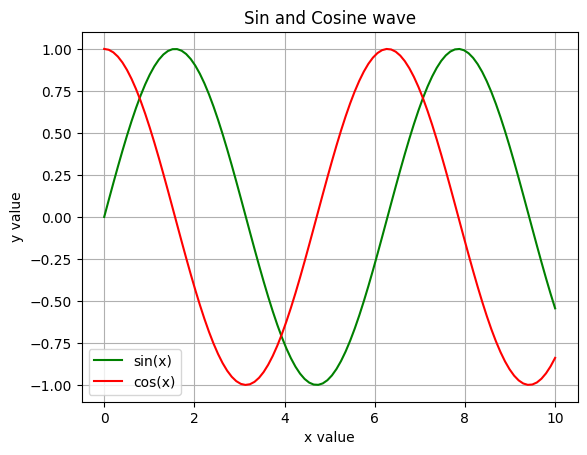

In [ ]:
# sine and cosine in same image

x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, label='sin(x)', color="green")
plt.plot(x, y2, label='cos(x)', color="red")
plt.title("Sin and Cosine wave")
plt.xlabel("x value")
plt.ylabel("y value")
plt.legend()
plt.grid(True)
plt.show()

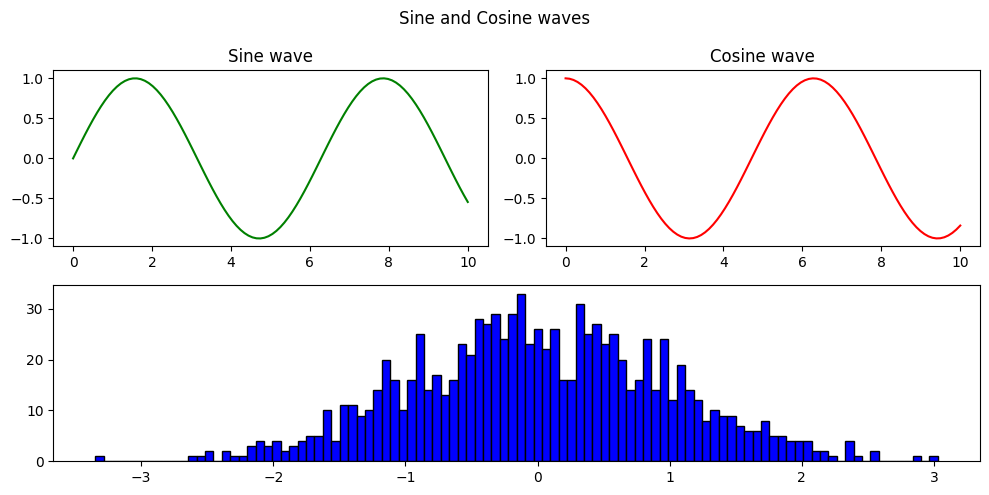

In [113]:
# sine and cosine using subplot

x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.plot(x, y1, label='sin(x)', color="green")
plt.title("Sine wave")

plt.subplot(2, 2, 2)
plt.plot(x, y2, label='cos(x)', color="red")
plt.title("Cosine wave")

data = np.random.randn(1000)
plt.subplot(2, 2, (3, 4))
plt.hist(data, bins=100, color="blue", edgecolor="black")

plt.suptitle("Sine and Cosine waves")
plt.tight_layout()
plt.show()